# Data Pre-processing

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, skew, kurtosis
from sklearn.preprocessing import StandardScaler
from scipy import stats
%matplotlib inline

In [29]:
data = pd.read_csv('train.csv')
testing = pd.read_csv('test.csv')

In [30]:
df = pd.DataFrame(data)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3304 entries, 0 to 3303
Data columns (total 37 columns):
id                 3304 non-null int64
distance_poi_A1    3197 non-null float64
distance_poi_A2    3210 non-null float64
distance_poi_A3    3204 non-null float64
distance_poi_A4    3193 non-null float64
distance_poi_A5    3212 non-null float64
distance_poi_A6    3186 non-null float64
distance_poi_B1    3199 non-null float64
distance_poi_B2    3188 non-null float64
distance_poi_B3    3196 non-null float64
distance_poi_B4    3193 non-null float64
facility_1         3187 non-null float64
facility_2         3200 non-null float64
facility_3         3191 non-null float64
facility_4         3209 non-null float64
facility_5         3202 non-null float64
female             3240 non-null float64
item_1             3199 non-null float64
item_2             3185 non-null float64
item_3             3197 non-null float64
item_4             3191 non-null float64
item_5             3196 non-null f

In [32]:
df.describe()

id  distance_poi_A1  distance_poi_A2  distance_poi_A3  \
count  3304.000000       3197.00000      3210.000000      3204.000000   
mean   2367.935230       8117.01345      3726.013707      3987.819913   
std    1121.335402       3313.86722      2779.514935      3108.526059   
min       5.000000        183.00000       398.000000       124.000000   
25%    1636.750000       6137.00000      1978.000000      1910.750000   
50%    2477.500000       8134.00000      3143.000000      3222.500000   
75%    3303.250000       9510.00000      4811.750000      5658.250000   
max    4129.000000      38960.00000     37515.000000     36849.000000   

       distance_poi_A4  distance_poi_A5  distance_poi_A6  distance_poi_B1  \
count      3193.000000      3212.000000      3186.000000      3199.000000   
mean       3923.986220      4366.228518      7253.592593      3804.011254   
std        2784.319142      3014.003072      3383.848526      2747.976083   
min         172.000000        82.000000       197.000000       152.000000   
25%        2212.000000      2347.750000      5609.250000      2091.500000   
50%        3240.000000      3780.500000      7162.000000      3346.000000   
75%        4996.000000      6069.750000      8797.000000      4944.000000   
max       35794.000000     35284.000000     40893.000000     37894.000000   

       distance_poi_B2  distance_poi_B3      ...         secret_10  secret_2  \
count      3188.000000      3196.000000      ...       3202.000000    3304.0   
mean       3838.325282      5308.572904      ...         23.427595       1.0   
std        3082.754778      2908.549237      ...          8.138461       0.0   
min          87.000000       126.000000      ...          8.000000       1.0   
25%        1809.750000      3855.500000      ...         18.000000       1.0   
50%        3001.000000      4983.000000      ...         22.800000       1.0   
75%        5418.250000      6120.250000      ...         24.000000       1.0   
max       37429.000000     35502.000000      ...         60.000000       1.0   

          secret_3     secret_4     secret_5     secret_6     secret_7  \
count  3193.000000  3193.000000  3191.000000  3201.000000  3197.000000   
mean      0.566239     0.193548     0.375744     0.422368     0.380982   
std       0.495671     0.395141     0.484390     0.494014     0.485704   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       1.000000     0.000000     0.000000     0.000000     0.000000   
75%       1.000000     0.000000     1.000000     1.000000     1.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

          secret_8  secret_9         price  
count  3208.000000    3304.0  3.304000e+03  
mean      0.635599       0.0  8.932113e+05  
std       0.481337       0.0  6.225847e+05  
min       0.000000       0.0  1.000000e+05  
25%       0.000000       0.0  5.000000e+05  
50%       1.000000       0.0  6.700000e+05  
75%       1.000000       0.0  1.150000e+06  
max       1.000000       0.0  5.000000e+06  

[8 rows x 37 columns]

In [33]:
df.describe()['price']

count    3.304000e+03
mean     8.932113e+05
std      6.225847e+05
min      1.000000e+05
25%      5.000000e+05
50%      6.700000e+05
75%      1.150000e+06
max      5.000000e+06
Name: price, dtype: float64

Figuring the most significant-correlated features 

In [34]:
correlations = data.corr()
correlations = correlations["price"].sort_values(ascending=False)
features = correlations.index[1:6]
correlations

price              1.000000
item_2             0.686121
facility_1         0.572182
secret_4           0.557345
room_size          0.445514
secret_10          0.445514
secret_7           0.445130
item_3             0.445130
item_1             0.415765
secret_1           0.402786
facility_3         0.378727
facility_2         0.352548
secret_8           0.324253
secret_6           0.319300
secret_3           0.299200
female             0.206592
item_5             0.202853
longitude          0.093013
male               0.079260
latitude           0.064751
distance_poi_B4    0.058845
distance_poi_A6    0.051421
distance_poi_A1    0.050952
facility_4         0.027651
distance_poi_B3   -0.032317
id                -0.058067
facility_5        -0.059582
distance_poi_A4   -0.139121
distance_poi_A5   -0.141022
distance_poi_A2   -0.142293
distance_poi_B1   -0.143138
distance_poi_A3   -0.173059
distance_poi_B2   -0.175917
secret_5          -0.399838
item_4            -0.399838
secret_2            

In [35]:
male = (df['male']==1) 
female = (df['male']==0) 
print(male.sum(), " male")
print(female.sum(), " female")

female_2 = (df['female']==1) 
print(female_2.sum(), " female")

error = (df['female']==1) & (df['male']==1) 
error_2 = (df['female']==0) & (df['male']==0) 
print(error.sum()," bigender errors")
print(error_2.sum()," no gender errors")

1451  male
1740  female
2300  female
512  bigender errors
0  no gender errors


part of EDA -> Unclear feature: male and female. Thus, i eliminated it.

In [36]:
df.drop(columns=['id','latitude','longitude','male','female','secret_2','secret_9'], inplace=True)

In [37]:
testing.drop(columns=['id','latitude','longitude','male','female','secret_2','secret_9'], inplace=True)

### Imputing Null Values
If you look at the data description file provided, you will see that for some categories, NaN actually means something. This means that if a value is NaN, the house might not have that certain attribute, which will affect the price of the house. Therefore, it is better to not drop, but fill in the null cell with a value called "None" which serves as its own category.#1.Imputing Null Values

In [38]:
null_cols=[]
for i in df.columns:
    if(df[i].isnull().sum()>0):
        print("column ",i , " has ",df[i].isnull().sum()," null data")
        null_cols.append(i)

column  distance_poi_A1  has  107  null data
column  distance_poi_A2  has  94  null data
column  distance_poi_A3  has  100  null data
column  distance_poi_A4  has  111  null data
column  distance_poi_A5  has  92  null data
column  distance_poi_A6  has  118  null data
column  distance_poi_B1  has  105  null data
column  distance_poi_B2  has  116  null data
column  distance_poi_B3  has  108  null data
column  distance_poi_B4  has  111  null data
column  facility_1  has  117  null data
column  facility_2  has  104  null data
column  facility_3  has  113  null data
column  facility_4  has  95  null data
column  facility_5  has  102  null data
column  item_1  has  105  null data
column  item_2  has  119  null data
column  item_3  has  107  null data
column  item_4  has  113  null data
column  item_5  has  108  null data
column  room_size  has  102  null data
column  secret_1  has  95  null data
column  secret_10  has  102  null data
column  secret_3  has  111  null data
column  secret_4  ha

In [39]:
from sklearn.preprocessing import Imputer

imputer = Imputer(strategy="median")

C:\Users\fathinah\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [40]:
training_null = pd.isnull(df).sum()
testing_null = pd.isnull(testing).sum()

null = pd.concat([training_null, testing_null], axis=1, keys=["Training", "Testing"])

C:\Users\fathinah\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


No feature should be deleted, only small amount of data missed per each feature ( no more than 200 ) and no missing data in test data

In [41]:
training_null.max()

119

In [42]:
null

Training  Testing
distance_poi_A1       107      0.0
distance_poi_A2        94      0.0
distance_poi_A3       100      0.0
distance_poi_A4       111      0.0
distance_poi_A5        92      0.0
distance_poi_A6       118      0.0
distance_poi_B1       105      0.0
distance_poi_B2       116      0.0
distance_poi_B3       108      0.0
distance_poi_B4       111      0.0
facility_1            117      0.0
facility_2            104      0.0
facility_3            113      0.0
facility_4             95      0.0
facility_5            102      0.0
item_1                105      0.0
item_2                119      0.0
item_3                107      0.0
item_4                113      0.0
item_5                108      0.0
price                   0      NaN
room_size             102      0.0
secret_1               95      0.0
secret_10             102      0.0
secret_3              111      0.0
secret_4              111      0.0
secret_5              113      0.0
secret_6              103      0.0
secret_7              107      0.0
secret_8               96      0.0

In [43]:
for i in null.index:
    df[i].fillna(df[i].median(), inplace=True)
    df[i].fillna(df[i].median(), inplace=True)

In [44]:
training_null = pd.isnull(df).sum()
training_null.head()

distance_poi_A1    0
distance_poi_A2    0
distance_poi_A3    0
distance_poi_A4    0
distance_poi_A5    0
dtype: int64

### Exploratory Data Analysis

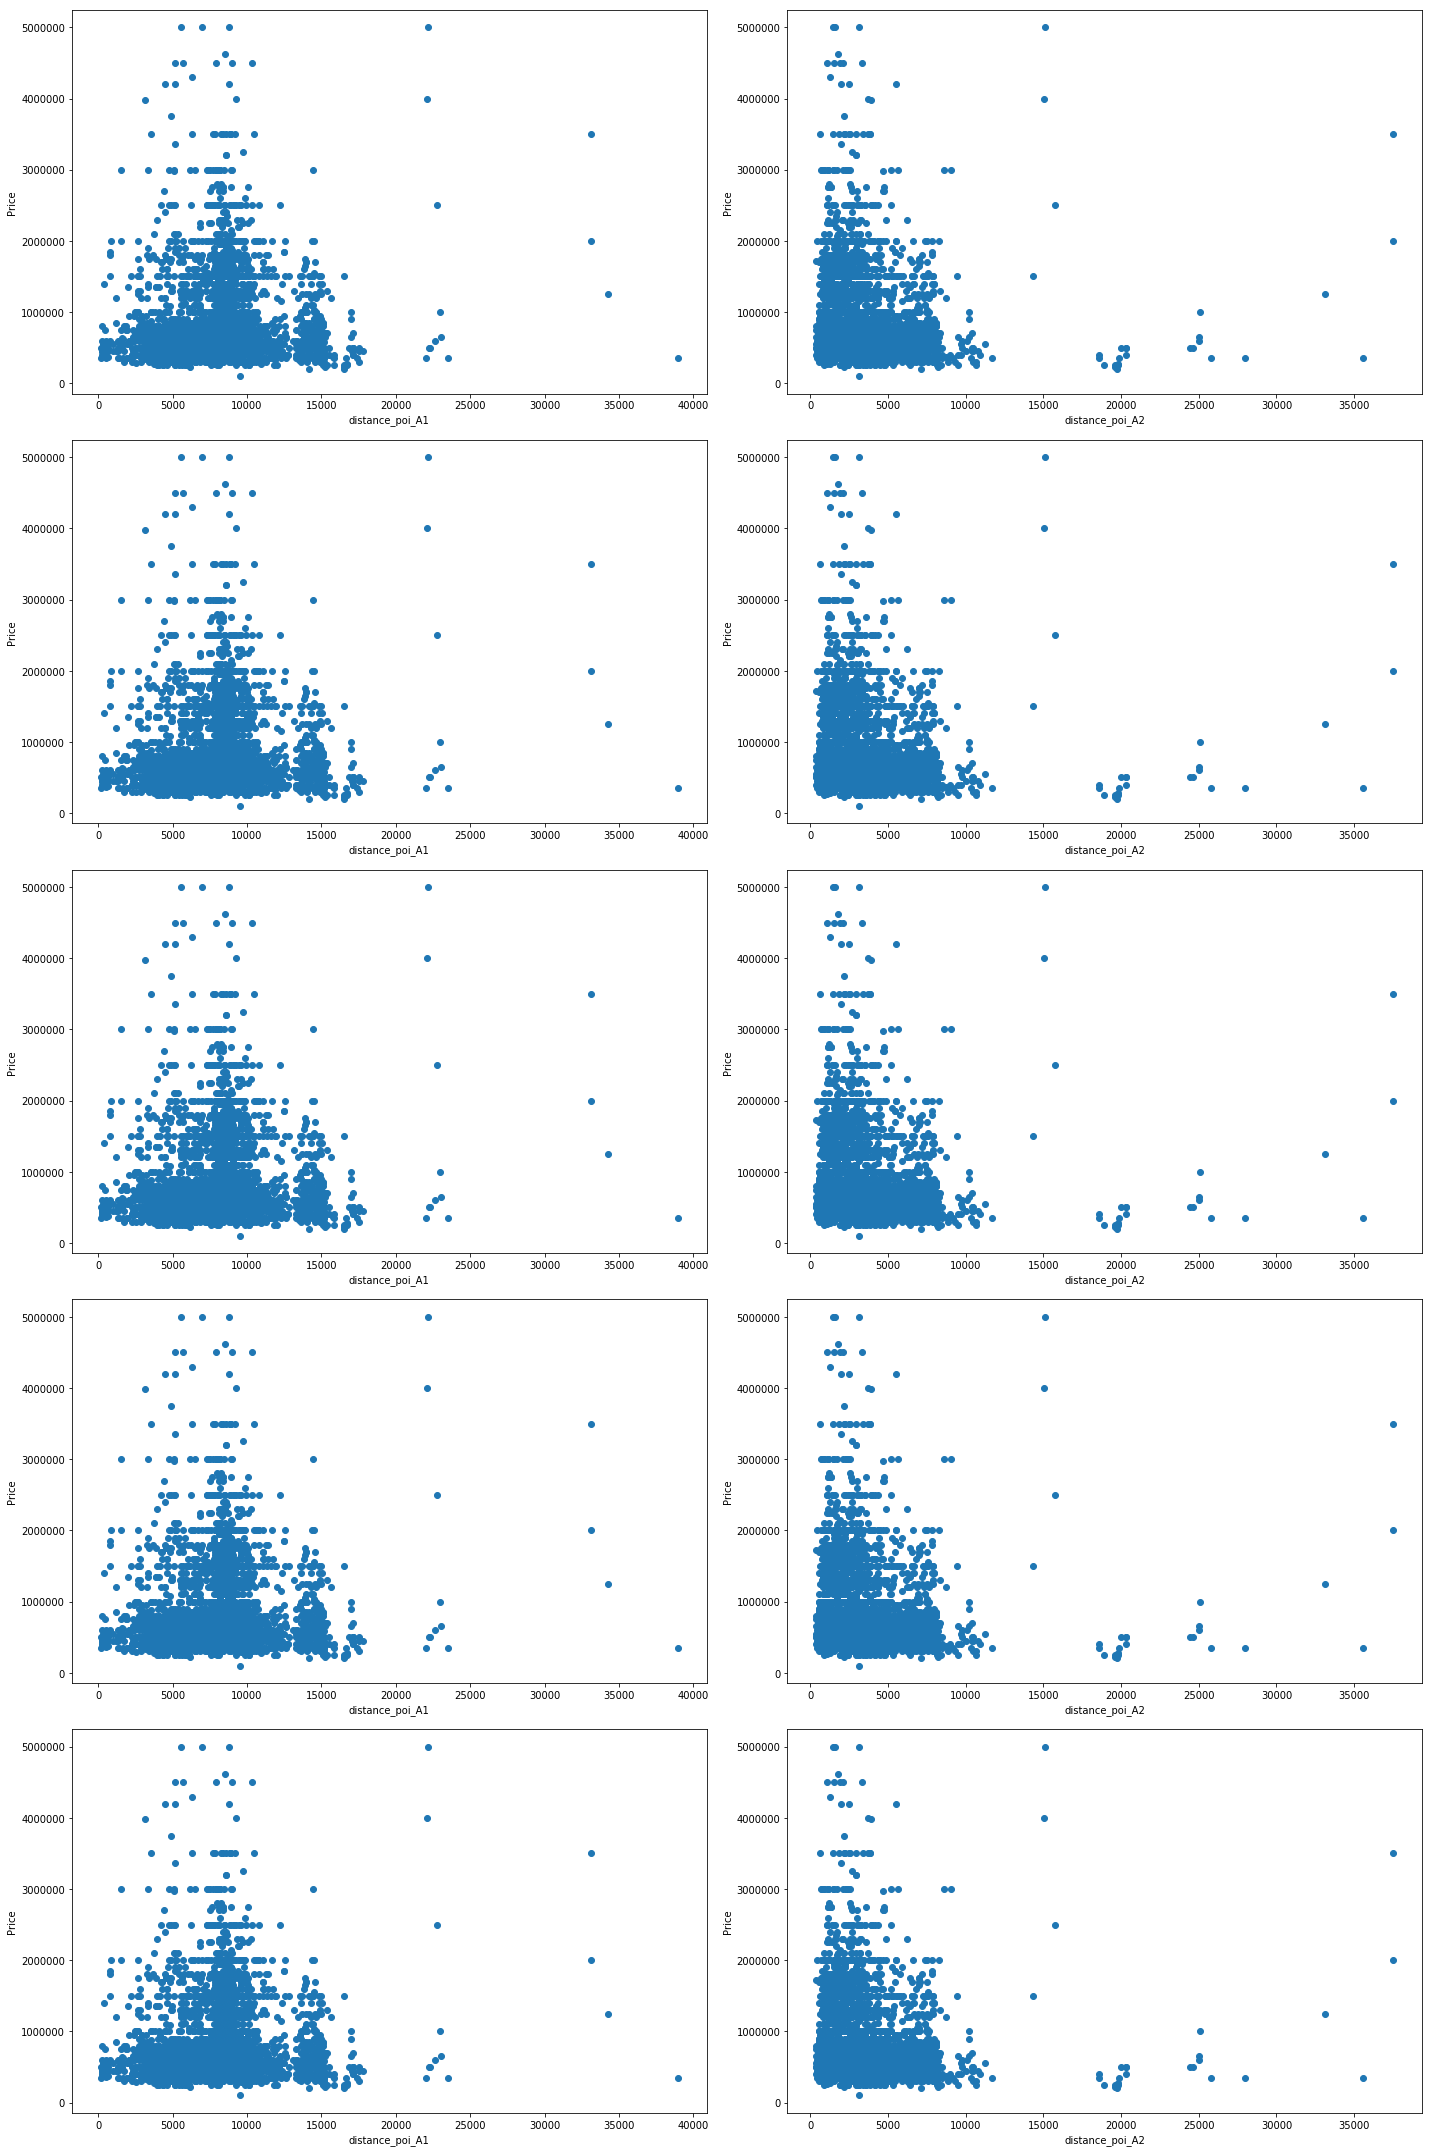

In [45]:
fea=['distance_poi_A1', 'distance_poi_A2', 'distance_poi_A3',
       'distance_poi_A4', 'distance_poi_A5', 'distance_poi_A6',
       'distance_poi_B1', 'distance_poi_B2', 'distance_poi_B3',
       'distance_poi_B4']
fig,axes = plt.subplots(nrows=5,ncols=2,figsize=(20,30))

for row in axes:
    for ax,j in zip(row,fea):
        ax.scatter(df[j],df['price'])
        ax.set_xlabel(j)
        ax.set_ylabel("Price")

plt.tight_layout()

The above picture shows small correlation between price and distance

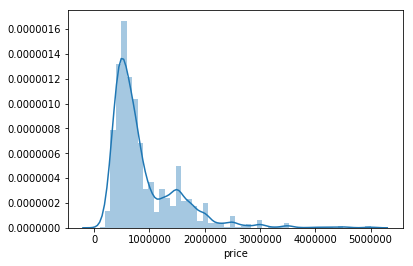

In [51]:
sns.distplot(df["price"])

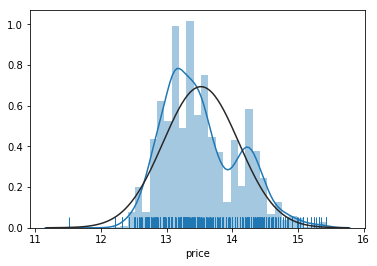

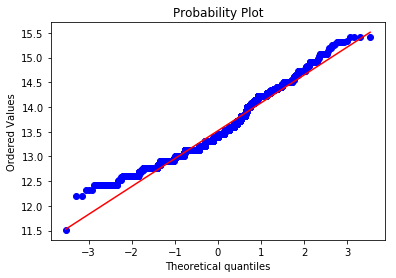

In [52]:
from scipy.stats import norm
dist = sns.distplot(np.log(df['price']), fit=norm, rug=True)

fig = plt.figure()
res = stats.probplot(np.log(df['price']), plot=plt)

In [53]:
#skewness and kurtosis
print("Skewness: %f" % df['price'].skew())
print("Kurtosis: %f" % df['price'].kurt())
print("After applying natural log function")
x = skew(np.log(df['price']))
y= kurtosis(np.log(df['price']))
print("Skewness: ",x,"| Kurtosis: ",y)

Skewness: 2.207624
Kurtosis: 7.033901
After applying natural log function
Skewness:  0.5640659321960508 | Kurtosis:  -0.22579220622672214


### Feature Engineering

In [54]:
df['TransformedPrice']= np.log(df['price'])

In [55]:
df.head(5)

distance_poi_A1  distance_poi_A2  distance_poi_A3  distance_poi_A4  \
0           8436.0           2785.0           5045.0           4618.0   
1           8138.0           1120.0           2178.0           2305.0   
2           9126.0           3662.0            954.0           2748.0   
3          12524.0           3143.0           5103.0           6648.0   
4           9966.0           4102.0           1303.0           3501.0   

   distance_poi_A5  distance_poi_A6  distance_poi_B1  distance_poi_B2  \
0           3780.5           5560.0           2376.0           4495.0   
1           3780.5           6852.0           1146.0           1676.0   
2           1380.0           9245.0           3968.0           1563.0   
3           6695.0          10365.0           5324.0           4555.0   
4           2273.0           9845.0           4348.0           1670.0   

   distance_poi_B3  distance_poi_B4        ...         secret_1  secret_10  \
0           6199.0           4972.0        ...              0.0       18.0   
1           4724.0           6610.0        ...              0.0       24.0   
2           5064.0           9220.0        ...              0.0       18.0   
3           9195.0           9819.0        ...              1.0       24.0   
4           5924.0           9752.0        ...              0.0       18.0   

   secret_3  secret_4  secret_5  secret_6  secret_7  secret_8    price  \
0       0.0       0.0       0.0       0.0       0.0       1.0   600000   
1       1.0       0.0       0.0       1.0       0.0       1.0   475000   
2       1.0       0.0       1.0       1.0       0.0       1.0   550000   
3       1.0       1.0       0.0       0.0       1.0       1.0  1500000   
4       1.0       0.0       1.0       1.0       0.0       1.0   700000   

   TransformedPrice  
0         13.304685  
1         13.071070  
2         13.217674  
3         14.220976  
4         13.458836  

[5 rows x 31 columns]

### Modelling and Evaluation

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score,KFold

In [60]:
X_train = df.drop(["price","TransformedPrice"], axis=1).values
y_train = df["TransformedPrice"].values

In [61]:
X_training,X_test,y_training,y_test = train_test_split(X_train,y_train, test_size=0.2, random_state=0)

In [62]:
linreg = LinearRegression()
parameters_lin = {"fit_intercept" : [True, False], "normalize" : [True, False], "copy_X" : [True, False]}
linreg_grid = GridSearchCV(linreg, parameters_lin, verbose=1, scoring="r2")
linreg_grid.fit(X_training, y_training)

print("Best LinReg Model: " + str(linreg_grid.best_estimator_))
print("Best Score: " + str(linreg_grid.best_score_))

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best LinReg Model: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
Best Score: 0.6852724217555105


C:\Users\fathinah\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.0s finished


In [63]:
linreg = linreg_grid.best_estimator_
linreg.fit(X_training,y_training)
lin_predicted = linreg.predict(X_test)
lin_r2= r2_score(y_test, lin_predicted)
lin_rmse = np.sqrt(mean_squared_error(y_test,lin_predicted))

print("R2 score :"+ str(lin_r2))
print("RMSE :"+ str(lin_rmse))

R2 score :0.7000695893072387
RMSE :0.3025412798837534


In [27]:
scores_lin = cross_val_score(linreg, X_training, y_training, cv=10, scoring="r2")
print("Cross Validation Score: " + str(np.mean(scores_lin)))

Cross Validation Score: 0.6855224671715969


Ridge Model

In [64]:
ridge = Ridge()
parameters_ridge = {"fit_intercept" : [True, False], "normalize" : [True, False], "copy_X" : [True, False], "solver" : ["auto"]}
grid_ridge = GridSearchCV(ridge, parameters_ridge, verbose=1, scoring="r2")
grid_ridge.fit(X_training, y_training)

print("Best Ridge Model: " + str(grid_ridge.best_estimator_))
print("Best Score: " + str(grid_ridge.best_score_))

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best Ridge Model: Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
Best Score: 0.6852955376851569


C:\Users\fathinah\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.0s finished


In [65]:
ridge = grid_ridge.best_estimator_
ridge.fit(X_training, y_training)
ridge_pred = ridge.predict(X_test)
r2_ridge = r2_score(y_test, ridge_pred)
rmse_ridge = np.sqrt(mean_squared_error(y_test, ridge_pred))
print("R^2 Score: " + str(r2_ridge))
print("RMSE Score: " + str(rmse_ridge))

R^2 Score: 0.7001045785472635
RMSE Score: 0.3025236324598413


In [66]:
scores_ridge = cross_val_score(ridge, X_training, y_training, cv=10, scoring="r2")
print("Cross Validation Score: " + str(np.mean(scores_ridge)))

Cross Validation Score: 0.6855412936217573


Random Forest Regressor

In [ ]:
rf = RandomForestRegressor()
paremeters_rf = {"n_estimators" : [5, 10, 15, 20], "criterion" : ["mse" , "mae"], "min_samples_split" : [2, 3, 5, 10], 
                 "max_features" : ["auto", "log2"]}
grid_rf = GridSearchCV(rf, paremeters_rf, verbose=1, scoring="r2")
grid_rf.fit(X_training, y_training)

print("Best RandomForestRegressor Model: " + str(grid_rf.best_estimator_))
print("Best Score: " + str(grid_rf.best_score_))

C:\Users\fathinah\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 64 candidates, totalling 192 fits


this model won't work here, too large dataset

In [ ]:
rf = grid_rf.best_estimator_
rf.fit(X_training, y_training)
rf_pred = rf.predict(X_test)
r2_rf = r2_score(y_test, rf_pred)
rmse_rf = np.sqrt(mean_squared_error(y_test, rf_pred))
print("R^2 Score: " + str(r2_rf))
print("RMSE Score: " + str(rmse_rf))

# Further Evaluation

In [68]:
model_performances = pd.DataFrame({
    "Model" : ["Linear Regression", "Ridge"],
    "Best Score" : [linreg_grid.best_score_,  grid_ridge.best_score_],
    "R Squared" : [str(lin_r2)[0:5], str(r2_ridge)[0:5]],
    "RMSE" : [str(lin_rmse)[0:8], str(rmse_ridge)[0:8]]
})
model_performances.round(4)

print("Sorted by Best Score:")
model_performances.sort_values(by="Best Score", ascending=False)

Sorted by Best Score:


Model  Best Score R Squared      RMSE
1              Ridge    0.685296     0.700  0.302523
0  Linear Regression    0.685272     0.700  0.302541

In [69]:
print("Sorted by R Squared:")
model_performances.sort_values(by="R Squared", ascending=False)

Sorted by R Squared:


Model  Best Score R Squared      RMSE
0  Linear Regression    0.685272     0.700  0.302541
1              Ridge    0.685296     0.700  0.302523

In [70]:
print("Sorted by RMSE:")
model_performances.sort_values(by="RMSE", ascending=True)

Sorted by RMSE:


Model  Best Score R Squared      RMSE
1              Ridge    0.685296     0.700  0.302523
0  Linear Regression    0.685272     0.700  0.302541

In [76]:
linreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [77]:
testing = pd.read_csv("test.csv")

In [78]:
X_test = testing.drop(columns=['id','latitude','longitude','male','female','secret_2','secret_9'])

# Submission!

In [79]:
submission_predictions = np.exp(linreg.predict(X_test))

In [80]:
submission = pd.DataFrame({
        "id": testing["id"],
        "price": submission_predictions
    })

submission.to_csv("prices_iiw.csv", index=False)
print(submission.shape)

(826, 2)
